In [22]:
## 1. 🔍 Mirando el Panorama General

#Primero, necesitamos entender qué problema queremos resolver.


# Importamos las herramientas que vamos a usar
import pandas as pd  # 🟨 pandas: para manejar datos como si fueran tablas de Excel

import numpy as np  # 🔢 numpy: para hacer cálculos rápidos como promedios y sumas

import matplotlib.pyplot as plt  # 📈 matplotlib: para dibujar gráficos (líneas, puntos, etc.)

import seaborn as sns  # 🎨 seaborn: para hacer gráficos más lindos y coloridos

from sklearn.model_selection import train_test_split, RandomizedSearchCV  
# ✂️ train_test_split: divide los datos en 2 partes: una para entrenar y otra para probar
# 🎲 RandomizedSearchCV: prueba distintas configuraciones para ver cuál funciona mejor

from sklearn.preprocessing import StandardScaler  
# ⚖️ StandardScaler: pone todos los números en la misma escala (muy importante para que el modelo no se confunda)

from sklearn.ensemble import RandomForestRegressor  
# 🌳 RandomForestRegressor: nuestro "bosque mágico" que predice los precios de casas

from sklearn.pipeline import Pipeline  
# 🚚 Pipeline: une todos los pasos como si fuera una cinta transportadora que lleva el trabajo

from sklearn.metrics import mean_squared_error  
# 📏 mean_squared_error: mide cuánto se equivocó nuestro modelo (cuanto más chico, mejor)

from scipy.stats import randint  
# 🎰 randint: permite probar diferentes números aleatorios (para mejorar el modelo con pruebas)

import joblib  
# 💾 joblib: nos permite guardar nuestro modelo entrenado, como si lo metiéramos en una caja fuerte para usarlo después


# Definimos nuestro problema
problema = """
PROBLEMA: Adivinar el precio de casas según su tamaño y número de habitaciones
OBJETIVO: Crear un modelo que pueda predecir precios lo más precisos posible
MÉTODO: Usaremos un "bosque mágico" (Random Forest) que aprenderá de casas vendidas
"""

print(problema)

#**Explicación para niños:** 
#¿Alguna vez has jugado a adivinar? Imagina que quieres adivinar cuánto cuesta una casa. Es como un juego donde tú dices: "Esta casa tiene 3 habitaciones y es grande, así que debe costar mucho". Vamos a enseñarle a la computadora a jugar este juego de adivinar, pero con matemáticas.




PROBLEMA: Adivinar el precio de casas según su tamaño y número de habitaciones
OBJETIVO: Crear un modelo que pueda predecir precios lo más precisos posible
MÉTODO: Usaremos un "bosque mágico" (Random Forest) que aprenderá de casas vendidas



In [3]:

## 2. 📥 Obteniendo los Datos

#Ahora necesitamos datos para que nuestra computadora aprenda.


# Creamos datos de ejemplo sobre casas
data = {
    "tamaño": [50, 60, 70, 80, 90, 100, 110, 120, 130, 140],  # Tamaño en m²
    "habitaciones": [1, 2, 2, 3, 3, 4, 4, 5, 5, 6],  # Número de habitaciones
    "precio": [150000, 180000, 200000, 240000, 270000, 300000, 320000, 350000, 380000, 400000]  # Precio en $
}

# Guardamos estos datos en una "tabla mágica" llamada DataFrame
df = pd.DataFrame(data)

# Mostramos nuestros datos
print("👀 Nuestros datos de casas:")
print(df)


#**Explicación para niños:**
#Esto es como hacer una lista de casas en un cuaderno. Para cada casa anotamos:
#- Cuánto mide (tamaño)
#- Cuántos cuartos tiene (habitaciones)
#- Cuánto cuesta (precio)

#Es como la tabla de información que usaría un detective para investigar casas. ¡Con esta información nuestra computadora va a aprender!



👀 Nuestros datos de casas:
   tamaño  habitaciones  precio
0      50             1  150000
1      60             2  180000
2      70             2  200000
3      80             3  240000
4      90             3  270000
5     100             4  300000
6     110             4  320000
7     120             5  350000
8     130             5  380000
9     140             6  400000



📏 ¿Cómo son nuestros datos?
           tamaño  habitaciones         precio
count   10.000000     10.000000      10.000000
mean    95.000000      3.500000  279000.000000
std     30.276504      1.581139   85822.814889
min     50.000000      1.000000  150000.000000
25%     72.500000      2.250000  210000.000000
50%     95.000000      3.500000  285000.000000
75%    117.500000      4.750000  342500.000000
max    140.000000      6.000000  400000.000000


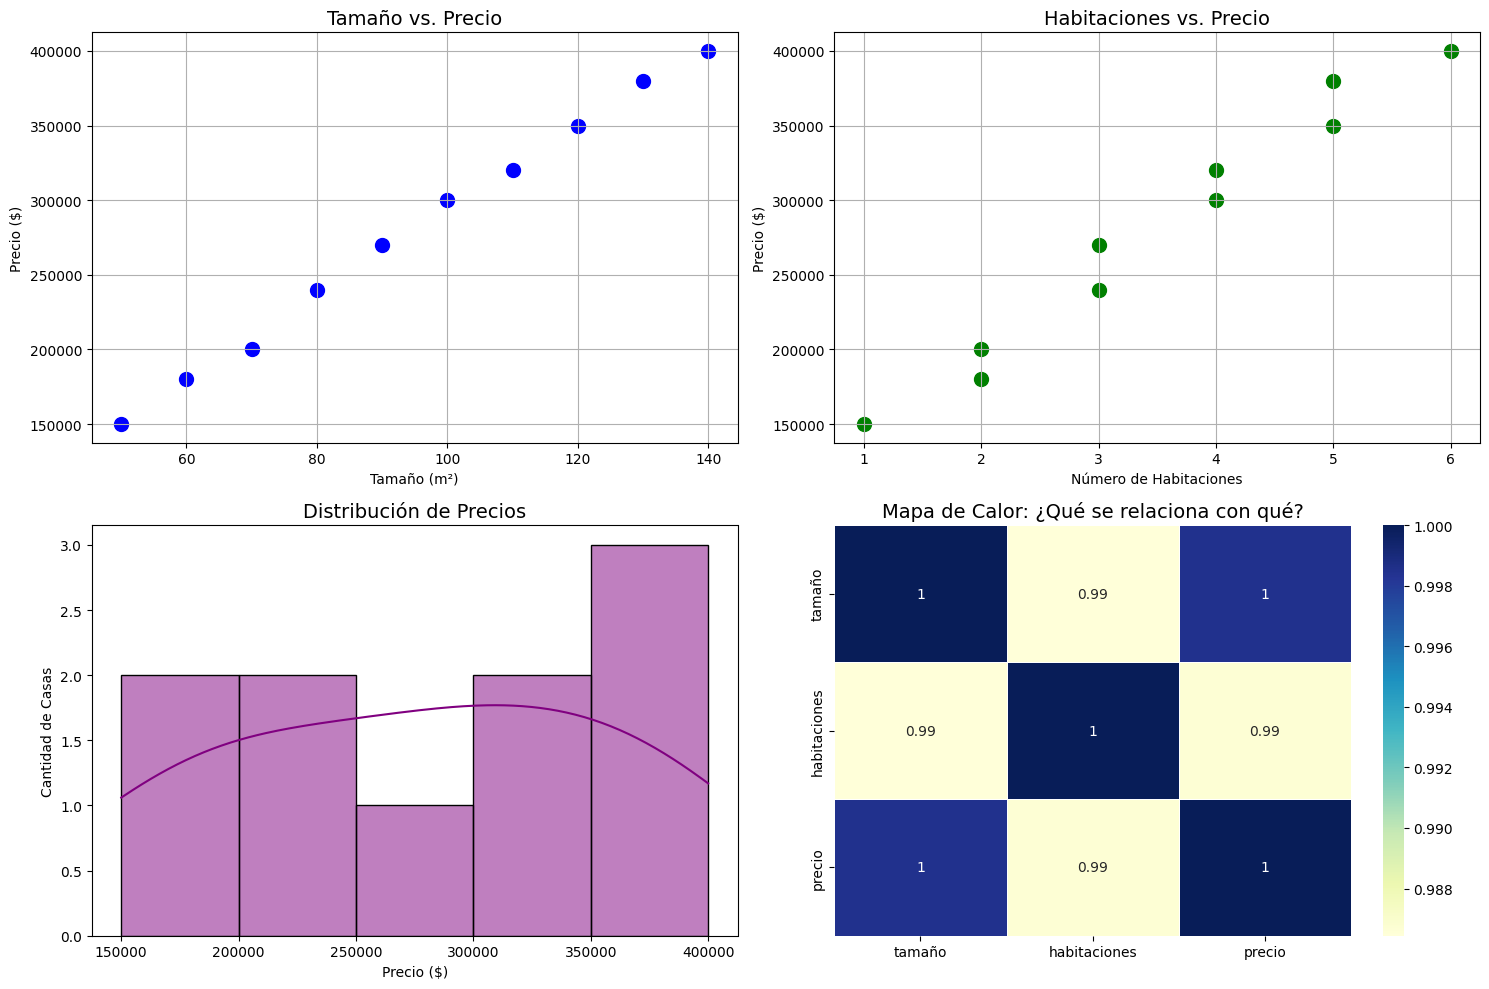


🔍 Correlación entre variables:
                tamaño  habitaciones    precio
tamaño        1.000000       0.98644  0.998472
habitaciones  0.986440       1.00000  0.986670
precio        0.998472       0.98667  1.000000


In [ ]:
## 3. 📊 Explorando y Visualizando los Datos

#Veamos qué nos dicen estos datos con algunos dibujos.


# Estadísticas básicas de nuestros datos
print("\n📏 ¿Cómo son nuestros datos?")
print(df.describe())

# Creamos una figura grande para nuestros gráficos
plt.figure(figsize=(15, 10))

# Gráfico 1: Relación entre tamaño y precio
plt.subplot(2, 2, 1)
plt.scatter(df["tamaño"], df["precio"], color="blue", s=100)
plt.title("Tamaño vs. Precio", fontsize=14)
plt.xlabel("Tamaño (m²)")
plt.ylabel("Precio ($)")
plt.grid(True)

# Gráfico 2: Relación entre habitaciones y precio
plt.subplot(2, 2, 2)
plt.scatter(df["habitaciones"], df["precio"], color="green", s=100)
plt.title("Habitaciones vs. Precio", fontsize=14)
plt.xlabel("Número de Habitaciones")
plt.ylabel("Precio ($)")
plt.grid(True)

# Gráfico 3: Distribución de precios
plt.subplot(2, 2, 3)
sns.histplot(df["precio"], bins=5, kde=True, color="purple")
plt.title("Distribución de Precios", fontsize=14)
plt.xlabel("Precio ($)")
plt.ylabel("Cantidad de Casas")

# Gráfico 4: Mapa de calor de correlaciones
plt.subplot(2, 2, 4)
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu", linewidths=0.5)
plt.title("Mapa de Calor: ¿Qué se relaciona con qué?", fontsize=14)

plt.tight_layout()
plt.savefig("exploracion_datos.png")
plt.show()

# Calculemos la correlación
print("\n🔍 Correlación entre variables:")
print(df.corr())


# Explicación:
# Ahora hacemos dibujos para entender mejor:
# 1. El primer dibujo muestra cómo cuando una casa es más grande (más metros), el precio sube (como subir una montaña).
# 2. El segundo dibujo muestra que más habitaciones significan casas más caras.
# 3. El tercer dibujo es como ver cuántas casas hay de cada precio.
# 4. El último dibujo es un mapa de calor - los colores más oscuros significan que dos cosas están muy conectadas.

# Es como cuando dibujas para entender mejor tu tarea de matemáticas. ¡Los dibujos nos ayudan a ver patrones!



### 1) **Correlación entre variables: ¿Qué significa?**

**Imagina esto:**
Tienes tres cosas: el tamaño de una casa, el número de habitaciones y el precio. La correlación nos dice qué tan conectadas están estas cosas. Es como preguntar: "¿Si el tamaño de la casa aumenta, también aumenta el precio?"

**Ejemplo visual:**
- Piensa en globos. Si inflas un globo más grande (tamaño), ¿qué pasa con el precio? ¡Sube! Esto significa que hay una **correlación positiva**.
- Si no hay conexión, como entre el color del globo y su precio, entonces la correlación sería **cero**.

**Qué significan los números:**
- **1.0**: Relación perfecta. Si una cosa sube, la otra también sube exactamente igual.
- **0.0**: No hay relación. Cambiar una cosa no afecta a la otra.
- **-1.0**: Relación inversa. Si una cosa sube, la otra baja.

**En tus datos:**
- **Tamaño y precio (0.998):** Muy conectados. Si el tamaño aumenta, el precio casi siempre aumenta.
- **Habitaciones y precio (0.986):** También conectados, pero un poco menos que el tamaño.
- **Tamaño y habitaciones (0.986):** Más tamaño suele significar más habitaciones.

**Cómo se calcula:**
La correlación se calcula con una fórmula matemática que compara cómo cambian dos cosas juntas. Pero no te preocupes por la fórmula, solo recuerda que los números nos dicen qué tan "amigos" son las variables.

---

### 2) **Mapa de calor: ¿Qué es y cómo interpretarlo?**

**Imagina esto:**
Un mapa de calor es como un dibujo que usa colores para mostrar qué tan conectadas están las cosas. Los colores más oscuros significan que están muy conectadas, y los colores claros significan que no lo están.

**Paso a paso del código:**
```python
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu", linewidths=0.5)
```
1. **`df.corr()`**: Calcula la correlación entre todas las variables (tamaño, habitaciones, precio).
2. **`sns.heatmap`**: Dibuja un cuadro donde cada celda muestra la correlación entre dos variables.
3. **`annot=True`**: Escribe los números dentro de las celdas.
4. **`cmap="YlGnBu"`**: Usa colores de amarillo (baja correlación) a azul oscuro (alta correlación).
5. **`linewidths=0.5`**: Agrega líneas entre las celdas para que sea más claro.

**Cómo interpretarlo:**
- Busca los colores más oscuros (azul): Significan que las variables están muy conectadas.
- Mira los números dentro de las celdas:
  - **1.0**: La variable está perfectamente conectada consigo misma (es obvio).
  - **0.998** (tamaño y precio): Muy conectados.
  - **0.986** (habitaciones y precio): También conectados, pero un poco menos.

**Ejemplo visual:**
Es como un tablero de amigos. Si dos personas son muy amigas, el cuadro entre ellas será azul oscuro. Si no se conocen, será amarillo.

---

### 3) **Distribución de precios: ¿Qué significa la línea?**

**Imagina esto:**
El gráfico muestra cuántas casas tienen precios en diferentes rangos. Las barras son como cajas que agrupan casas con precios similares.

**Paso a paso del código:**
```python
sns.histplot(df["precio"], bins=5, kde=True, color="purple")
```
1. **`df["precio"]`**: Usa los precios de las casas.
2. **`bins=5`**: Divide los precios en 5 grupos (por ejemplo, $150,000-$200,000, $200,000-$250,000, etc.).
3. **`kde=True`**: Dibuja una línea suave que muestra la forma general de los datos.
4. **`color="purple"`**: Hace que las barras sean moradas.

**¿Qué significa la línea?**
- La línea es como un "camino" que conecta las cimas de las barras. Nos dice cómo están distribuidos los precios.
- Si la línea sube, significa que hay muchas casas en ese rango de precios.
- Si la línea baja, significa que hay pocas casas en ese rango.

**Ejemplo visual:**
Piensa en un parque con colinas. Las barras son como montañas, y la línea es un camino que sube y baja por las cimas. Si hay una montaña alta, significa que hay muchas casas con ese precio.

**En tu gráfico:**
- Si la línea es alta en el medio, significa que la mayoría de las casas tienen precios promedio.
- Si la línea es baja en los extremos, significa que hay pocas casas muy baratas o muy caras.

---

Resumen:
1. **Correlación:** Es como ver qué tan amigos son dos cosas. Si una sube y la otra también, son buenos amigos.
2. **Mapa de calor:** Es un dibujo con colores que muestra qué tan conectadas están las cosas. Azul oscuro = muy conectadas.
3. **Distribución de precios:** Las barras son montañas de casas, y la línea es un camino que muestra dónde hay más casas.

🧩 Características (tamaño y habitaciones):
   tamaño  habitaciones
0      50             1
1      60             2
2      70             2
3      80             3
4      90             3

💰 Etiquetas (precios):
0    150000
1    180000
2    200000
3    240000
4    270000
Name: precio, dtype: int64

🏋️ Datos de entrenamiento (80%): 8 casas
🧪 Datos de prueba (20%): 2 casas

📏 Antes de estandarizar:
   tamaño  habitaciones
5     100             4
0      50             1
7     120             5
2      70             2
9     140             6

📏 Después de estandarizar:
     tamaño  habitaciones
0  0.185695      0.333333
1 -1.671258     -1.666667
2  0.928477      1.000000
3 -0.928477     -1.000000
4  1.671258      1.666667


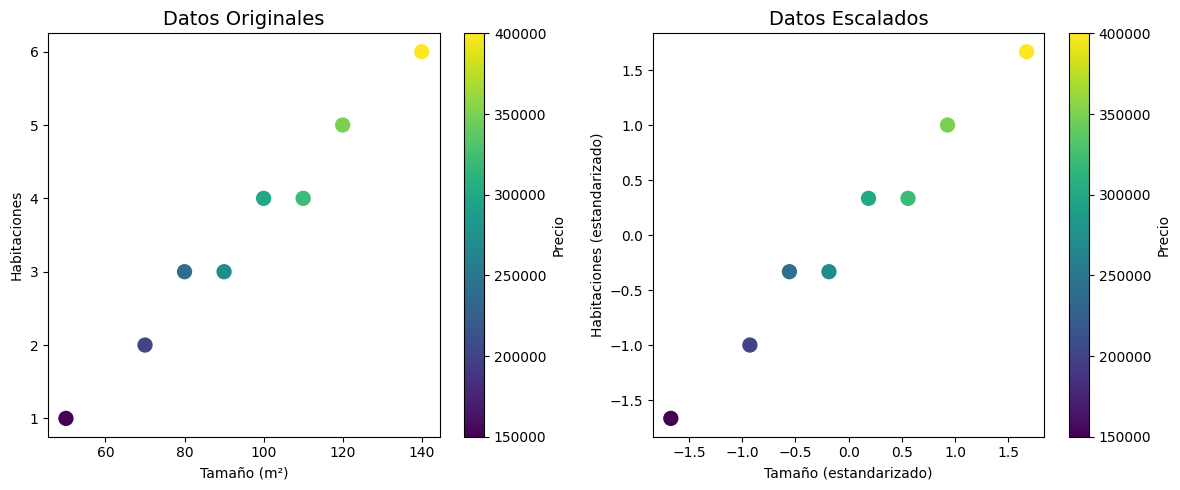

In [ ]:
## 4. 🧹 Preparando los Datos

#Ahora preparamos los datos para que la computadora pueda entenderlos mejor.


# Dividimos los datos en características (X) y etiquetas (y)
X = df[["tamaño", "habitaciones"]]  # Lo que usamos para adivinar
y = df["precio"]                    # Lo que queremos adivinar

print("🧩 Características (tamaño y habitaciones):")
print(X.head())
print("\n💰 Etiquetas (precios):")
print(y.head())

# Dividimos en datos para entrenar y datos para probar
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\n🏋️ Datos de entrenamiento (80%):", X_train.shape[0], "casas")
print("🧪 Datos de prueba (20%):", X_test.shape[0], "casas")

# Mostramos cómo se ven los datos antes de escalarlos
print("\n📏 Antes de estandarizar:")
print(X_train.head())

# Preparamos el escalador
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Mostramos cómo se ven los datos después de escalarlos
print("\n📏 Después de estandarizar:")
print(pd.DataFrame(X_train_scaled, columns=X.columns).head())

# Visualizamos datos originales vs. escalados
plt.figure(figsize=(12, 5))

# Datos originales
plt.subplot(1, 2, 1)
plt.scatter(X_train["tamaño"], X_train["habitaciones"], c=y_train, cmap="viridis", s=100)
plt.title("Datos Originales", fontsize=14)
plt.xlabel("Tamaño (m²)")
plt.ylabel("Habitaciones")
plt.colorbar(label="Precio")

# Datos escalados
plt.subplot(1, 2, 2)
X_scaled_df = pd.DataFrame(X_train_scaled, columns=X.columns)
plt.scatter(X_scaled_df["tamaño"], X_scaled_df["habitaciones"], c=y_train, cmap="viridis", s=100)
plt.title("Datos Escalados", fontsize=14)
plt.xlabel("Tamaño (estandarizado)")
plt.ylabel("Habitaciones (estandarizado)")
plt.colorbar(label="Precio")

plt.tight_layout()
plt.savefig("datos_escalados.png")
plt.show()


# Explicación :
# Esta parte es como ordenar tus juguetes antes de jugar:
# 1. Primero, separamos lo que conocemos (tamaño y habitaciones) de lo que queremos adivinar (precio).
# 2. Luego, dividimos nuestros datos en dos grupos: uno grande para que la computadora aprenda (entrenamiento) y otro pequeño para comprobar si aprendió bien (prueba).
# 3. Por último, "lavamos" los números para que todos estén en una escala parecida. Es como si tuvieras monedas de diferentes países y las convirtieras todas a una misma moneda para poder compararlas fácilmente.



Collecting workspace information# Explicación del Código para Preparación de Datos en Machine Learning

## 1. División de Datos en Entrenamiento y Prueba

```python
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\n🏋️ Datos de entrenamiento (80%):", X_train.shape[0], "casas")
print("🧪 Datos de prueba (20%):", X_test.shape[0], "casas")
```

### Explicación detallada:

Esta función `train_test_split` divide nuestros datos en dos partes:
- Un conjunto de **entrenamiento** (80% de los datos)
- Un conjunto de **prueba** (20% de los datos)

Los parámetros usados son:
- `X, y`: Los datos de entrada (características) y las etiquetas (precios)
- `test_size=0.2`: Indica que el 20% de los datos se usarán para pruebas
- `random_state=42`: Asegura que la división sea reproducible (siempre igual)

### ¿Por qué usar 80% para entrenar y 20% para probar?

La división 80-20 es una proporción estándar en machine learning que proporciona un buen equilibrio entre:
- Tener suficientes datos para entrenar el modelo adecuadamente
- Dejar datos suficientes para probar la capacidad de generalización del modelo

### ¿Existen otros métodos de división?

Sí, existen otras proporciones y técnicas:
- **División 70-30**: Cuando tienes muchos datos
- **División 90-10**: Cuando tienes pocos datos
- **Validación cruzada**: Divide los datos en múltiples partes (pliegues) y rota el conjunto de prueba
- **Muestreo estratificado**: Mantiene la proporción de clases en la división

### Explicación para público general (paso a paso):

1. "Imaginemos que tenemos un libro de recetas y queremos aprender a cocinar."
2. "Primero estudiamos el 80% de las recetas para aprender las técnicas (conjunto de entrenamiento)."
3. "Luego, probamos nuestras habilidades con el 20% restante de recetas que no hemos visto (conjunto de prueba)."
4. "Si podemos cocinar bien las recetas que nunca hemos visto, significa que realmente aprendimos a cocinar, no solo memorizar."
5. "De la misma manera, dividimos nuestros datos sobre casas: el modelo aprende con el 80% y luego probamos qué tan bien predice con el 20% restante."
6. "Esto nos asegura que nuestro modelo puede predecir precios de casas nuevas, no solo 'memorizar' los datos que ya vio."

## 2. Escalado de Datos

```python
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
```

### Explicación detallada:

El `StandardScaler` transforma los datos originales mediante:
1. **Centralización**: Resta la media de cada columna
2. **Normalización**: Divide cada valor por la desviación estándar

La fórmula matemática es:
```
x_scaled = (x - media) / desviación_estándar
```

Esto convierte los datos originales en valores que:
- Tienen una media de 0
- Tienen una desviación estándar de 1
- Generalmente caen entre -3 y +3, con la mayoría entre -1.5 y +1.5

### ¿Por qué usar StandardScaler?

1. **Mejora el rendimiento**: Muchos algoritmos funcionan mejor cuando las características están en escalas similares
2. **Convergencia más rápida**: Los algoritmos basados en gradiente convergen más rápido
3. **Evita dominancia de características**: Impide que las características con valores grandes dominen a las más pequeñas

### Explicación para público general (paso a paso):

1. "Imagina que estás comparando la altura de personas (medida en metros) con su peso (medido en kilos)."
2. "El peso tendría números mucho más grandes (60-90 kg) que la altura (1.5-1.9 m)."
3. "Si usamos estos números directamente, la computadora podría pensar que el peso es más importante simplemente porque los números son más grandes."
4. "El escalado es como convertir todo a una 'moneda común', para que la computadora pueda comparar justamente."
5. "StandardScaler convierte los datos a una escala donde 0 representa el valor promedio."
6. "Los valores positivos están por encima del promedio, los negativos por debajo."
7. "Por ejemplo, una casa de tamaño 1.5 (después de escalar) significa que es 1.5 desviaciones estándar más grande que la casa promedio."
8. "Casi todos los valores caen entre -3 y +3, siendo los valores entre -1.5 y +1.5 los más comunes."
9. "Esto es como dar una 'calificación justa' a cada característica, sin importar su escala original."

### Diferencia con hacerlo manualmente:

Si lo hiciéramos manualmente:
1. Calcularíamos la media y desviación estándar de cada columna
2. Restaríamos la media a cada valor
3. Dividiríamos por la desviación estándar

El `StandardScaler` hace esto automáticamente y además:
- Guarda los valores de media y desviación estándar del conjunto de entrenamiento
- Aplica exactamente la misma transformación a los datos de prueba
- Proporciona métodos para revertir la transformación cuando sea necesario
- Se integra perfectamente con el resto del flujo de trabajo de machine learning

Con esta explicación, cualquier persona debería poder entender por qué dividimos los datos y por qué los escalamos, incluso sin conocimientos previos de machine learning.

1.6.1
🌳 Vamos a entrenar un Bosque Aleatorio (Random Forest)
Este modelo es como si tuviéramos muchos adivinos y tomáramos el promedio de sus predicciones

🏋️ Entrenando el modelo...

📊 Error del modelo básico (RMSE): $14539.77
Esto significa que en promedio, nuestras predicciones están a $14539.77 del precio real

🔍 Comparación de predicciones vs. precios reales:
   Precio Real  Predicción  Diferencia
8       380000    359500.0     20500.0
1       180000    178400.0      1600.0


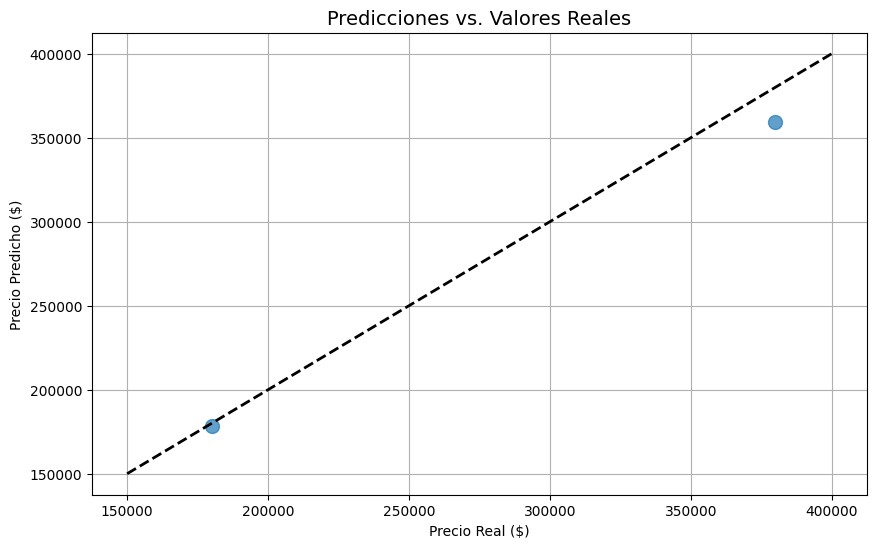

In [13]:
## 5. 🤖 Seleccionando un Modelo y Entrenándolo

#Ahora vamos a elegir un modelo y enseñarle a predecir precios.
import sklearn
print(sklearn.__version__)

# Creamos nuestro "bosque mágico" (Random Forest)
preprocessing = StandardScaler()
random_forest = RandomForestRegressor(random_state=42)

# Creamos un "camino" para procesar los datos (Pipeline)
pipeline = Pipeline([
    ("preprocessing", preprocessing),
    ("random_forest", random_forest)
])

print("🌳 Vamos a entrenar un Bosque Aleatorio (Random Forest)")
print("Este modelo es como si tuviéramos muchos adivinos y tomáramos el promedio de sus predicciones")

# Entrenamos el modelo
print("\n🏋️ Entrenando el modelo...")
pipeline.fit(X_train, y_train)

# Hacemos predicciones con el modelo básico
y_pred_basic = pipeline.predict(X_test)

# Evaluamos qué tan bueno es
from math import sqrt
rmse_basic = sqrt(mean_squared_error(y_test, y_pred_basic))
print(f"\n📊 Error del modelo básico (RMSE): ${rmse_basic:.2f}")
print(f"Esto significa que en promedio, nuestras predicciones están a ${rmse_basic:.2f} del precio real")

# Comparamos predicciones vs. valores reales
results_df = pd.DataFrame({
    'Precio Real': y_test,
    'Predicción': y_pred_basic,
    'Diferencia': y_test - y_pred_basic
})
print("\n🔍 Comparación de predicciones vs. precios reales:")
print(results_df)

# Visualizamos predicciones vs. valores reales
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_basic, s=100, alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Precio Real ($)')
plt.ylabel('Precio Predicho ($)')
plt.title('Predicciones vs. Valores Reales', fontsize=14)
plt.grid(True)
plt.savefig("predicciones_basicas.png")
plt.show()


# **Explicación para niños:**
# Aquí entrenamos a nuestra computadora, como si le enseñáramos a jugar un juego:
# 1. Usamos un "bosque mágico" (Random Forest) que es especial porque tiene muchos "árboles" (como muchos adivinos) que trabajan juntos.
# 2. Le mostramos muchos ejemplos de casas con sus precios para que aprenda los patrones.
# 3. Luego probamos si aprendió bien pidiéndole que adivine los precios de casas que no ha visto.
# 4. Medimos qué tan bueno es contando cuánto se equivoca en promedio.

# El gráfico muestra qué tan cerca están sus adivinanzas de los precios reales. Los puntos en la línea significan adivinanzas perfectas.



🔧 Buscando la mejor configuración para nuestro bosque mágico...
Estamos probando diferentes configuraciones como:
- ¿Cuántos árboles (adivinos) necesitamos?
- ¿Cuántas pistas deben mirar cada vez?
- ¿Qué tan complicadas pueden ser sus decisiones?

🌟 La mejor configuración encontrada es:
- max_depth: None
- max_features: 2
- n_estimators: 107

📊 Error del modelo mejorado (RMSE): $15175.05
Mejora: $-635.28 menos de error

🔍 Comparación de modelo básico vs. mejorado:
   Precio Real  Predicción Básica  Predicción Mejorada      Mejora
8       380000           359500.0        358598.130841 -901.869159
1       180000           178400.0        178411.214953   11.214953

🌟 La mejor configuración encontrada es:
- max_depth: None
- max_features: 2
- n_estimators: 107

📊 Error del modelo mejorado (RMSE): $15175.05
Mejora: $-635.28 menos de error

🔍 Comparación de modelo básico vs. mejorado:
   Precio Real  Predicción Básica  Predicción Mejorada      Mejora
8       380000           359500.0        

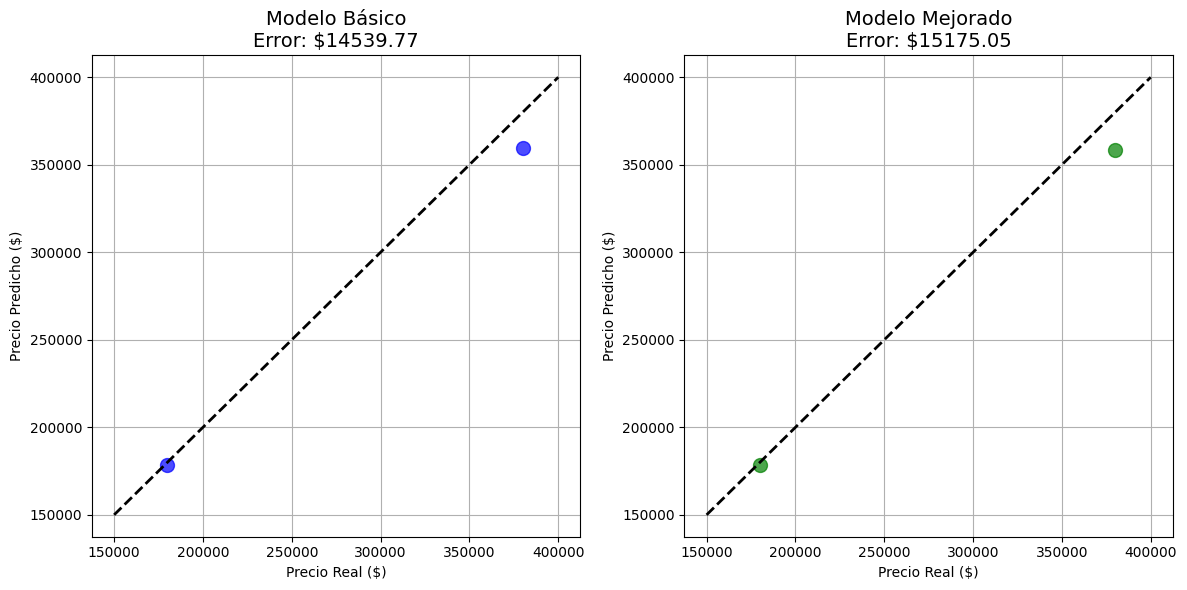

In [ ]:
## 6. 🛠️ Ajustando Finamente el Modelo

#Ahora vamos a mejorar nuestro modelo ajustando sus "configuraciones secretas".


# Definimos diferentes "configuraciones" para probar
param_distribs = {
    'random_forest__n_estimators': randint(50, 200),  # Número de árboles (adivinos)
    'random_forest__max_features': randint(1, 3),     # Número de pistas para mirar
    'random_forest__max_depth': [None, 10, 20, 30]    # Qué tan profundo puede pensar
}

print("🔧 Buscando la mejor configuración para nuestro bosque mágico...")
print("Estamos probando diferentes configuraciones como:")
print("- ¿Cuántos árboles (adivinos) necesitamos?")
print("- ¿Cuántas pistas deben mirar cada vez?")
print("- ¿Qué tan complicadas pueden ser sus decisiones?")

# Configuramos la búsqueda de los mejores parámetros
search = RandomizedSearchCV(
    pipeline, param_distributions=param_distribs, n_iter=10, cv=3,
    scoring='neg_root_mean_squared_error', random_state=42
)

# Entrenamos con diferentes configuraciones
search.fit(X_train, y_train)

# Mostramos la mejor configuración
print("\n🌟 La mejor configuración encontrada es:")
best_params = search.best_params_
for param, value in best_params.items():
    print(f"- {param.split('__')[1]}: {value}")

# Hacemos predicciones con el modelo mejorado
y_pred_tuned = search.best_estimator_.predict(X_test)

# Evaluamos qué tan bueno es ahora
from math import sqrt
rmse_tuned = sqrt(mean_squared_error(y_test, y_pred_tuned))
print(f"\n📊 Error del modelo mejorado (RMSE): ${rmse_tuned:.2f}")
print(f"Mejora: ${rmse_basic - rmse_tuned:.2f} menos de error")

# Comparamos antes vs después
results_df_tuned = pd.DataFrame({
    'Precio Real': y_test,
    'Predicción Básica': y_pred_basic,
    'Predicción Mejorada': y_pred_tuned,
    'Mejora': abs(y_test - y_pred_basic) - abs(y_test - y_pred_tuned)
})
print("\n🔍 Comparación de modelo básico vs. mejorado:")
print(results_df_tuned)

# Visualizamos la mejora
plt.figure(figsize=(12, 6))

# Modelo básico
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_basic, s=100, alpha=0.7, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Precio Real ($)')
plt.ylabel('Precio Predicho ($)')
plt.title(f'Modelo Básico\nError: ${rmse_basic:.2f}', fontsize=14)
plt.grid(True)

# Modelo mejorado
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_tuned, s=100, alpha=0.7, color='green')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Precio Real ($)')
plt.ylabel('Precio Predicho ($)')
plt.title(f'Modelo Mejorado\nError: ${rmse_tuned:.2f}', fontsize=14)
plt.grid(True)

plt.tight_layout()
plt.savefig("comparacion_modelos.png")
plt.show()


# Explicación para niños:
# Esta parte es como cuando ajustas tu bicicleta para que funcione mejor:
# 1. Probamos diferentes "configuraciones" para nuestro modelo (como ajustar el asiento y manillar de una bici).
# 2. La computadora prueba muchas combinaciones diferentes y encuentra la mejor.
# 3. Con la mejor configuración, nuestro modelo hace mejores adivinanzas.
# 4. Comparamos el modelo antiguo con el nuevo para ver cuánto mejoró.

# En los gráficos, podemos ver que las predicciones del modelo mejorado (verde) están más cerca de la línea punteada (predicciones perfectas) que las del modelo básico (azul).



# Entendiendo el Ajuste de un Modelo de Random Forest

## 1) Los Parámetros del Random Forest

Cuando definimos:
```python
param_distribs = {
    'random_forest__n_estimators': randint(50, 200),  # Número de árboles (adivinos)
    'random_forest__max_features': randint(1, 3),     # Número de pistas para mirar
    'random_forest__max_depth': [None, 10, 20, 30]    # Qué tan profundo puede pensar
}
```

Estamos definiendo **hiperparámetros** para optimizar nuestro modelo Random Forest. No son modelos en sí mismos, sino configuraciones que determinan cómo funciona el algoritmo. Sus nombres técnicos y funciones son:

### 1. `n_estimators` (Número de árboles)
- **Nombre real**: Número de estimadores (árboles)
- **Función**: Define cuántos árboles de decisión individuales se crean en el bosque aleatorio
- **Cómo funciona**: Más árboles generalmente dan mayor precisión pero requieren más tiempo de entrenamiento. Cada árbol "vota" sobre la predicción final y se toma el promedio.
- **Analogía**: Como tener más expertos dando su opinión sobre el precio de una casa.

### 2. `max_features` (Número de características a considerar)
- **Nombre real**: Máximo número de características 
- **Función**: Determina cuántas características (columnas) puede considerar cada árbol al buscar la mejor división
- **Cómo funciona**: Con un valor bajo, cada árbol considera solo algunas características, lo que aumenta la diversidad entre árboles
- **Analogía**: Si tienes muchos adivinos, pero cada uno solo mira ciertos aspectos de la casa (uno el tamaño, otro las habitaciones)

### 3. `max_depth` (Profundidad de cada árbol)
- **Nombre real**: Profundidad máxima del árbol
- **Función**: Limita cuántos niveles de decisión puede tener cada árbol
- **Cómo funciona**: Árboles más profundos pueden aprender relaciones más complejas pero tienden a sobreajustarse (memorizar en lugar de generalizar)
- **Analogía**: Cuántas preguntas en secuencia puede hacer cada adivino antes de dar su respuesta

## 2) La Búsqueda de Parámetros Óptimos

```python
search = RandomizedSearchCV(
    pipeline, param_distributions=param_distribs, n_iter=10, cv=3,
    scoring='neg_root_mean_squared_error', random_state=42
)
```

`RandomizedSearchCV` es un método de búsqueda automática de la mejor combinación de hiperparámetros:

- **Función**: Prueba diferentes combinaciones de hiperparámetros para encontrar los mejores
- **Cómo funciona**: 
  - `pipeline`: El proceso completo de preparación y modelado
  - `param_distributions`: Los parámetros que queremos probar (definidos antes)
  - `n_iter=10`: Probará 10 combinaciones diferentes de parámetros (en lugar de todas las posibles)
  - `cv=3`: Validación cruzada de 3 pliegues (divide los datos de entrenamiento en 3 partes)
  - `scoring='neg_root_mean_squared_error'`: Evalúa cada modelo usando el error cuadrático medio
  - `random_state=42`: Para reproducibilidad de resultados

**Validación cruzada (`cv=3`)**: Divide los datos de entrenamiento en 3 partes y rota qué parte se usa para validación, realizando 3 entrenamientos diferentes para cada combinación de parámetros.

**n_iter=10**: En lugar de probar todas las combinaciones posibles (que serían muchas), prueba 10 combinaciones aleatorias.

## 3) Entrenamiento y Selección del Mejor Modelo

```python
# Entrenamos con diferentes configuraciones
search.fit(X_train, y_train)
```

Este código entrena múltiples modelos con diferentes combinaciones de hiperparámetros:
- Internamente prueba 10 combinaciones diferentes de hiperparámetros
- Para cada combinación, realiza validación cruzada (3 pliegues)
- Evalúa cada modelo y guarda el rendimiento de cada combinación
- Al final, identifica la combinación que obtuvo el mejor resultado

## 4) Obteniendo y Usando el Mejor Modelo

```python
# Mostramos la mejor configuración
print("\n🌟 La mejor configuración encontrada es:")
best_params = search.best_params_
for param, value in best_params.items():
    print(f"- {param.split('__')[1]}: {value}")
```

Este código:
- Accede a la mejor combinación de hiperparámetros encontrada (`search.best_params_`)
- Extrae el nombre del parámetro quitando el prefijo "random_forest__"
- Muestra los valores óptimos de cada parámetro

```python
# Hacemos predicciones con el modelo mejorado
y_pred_tuned = search.best_estimator_.predict(X_test)
```

- `search.best_estimator_` es el modelo completo (pipeline) que tuvo el mejor rendimiento
- Se usa para predecir los precios de las casas en los datos de prueba

```python
# Evaluamos qué tan bueno es ahora
from math import sqrt
rmse_tuned = sqrt(mean_squared_error(y_test, y_pred_tuned))
print(f"\n📊 Error del modelo mejorado (RMSE): ${rmse_tuned:.2f}")
print(f"Mejora: ${rmse_basic - rmse_tuned:.2f} menos de error")
```

- Calcula el error del modelo mejorado usando RMSE
- Compara este error con el del modelo básico para ver cuánto mejoró

## 5) Significado de los Resultados

```
🌟 La mejor configuración encontrada es:
- max_depth: None
- max_features: 2
- n_estimators: 107
```

Estos son los mejores valores encontrados para nuestro modelo:
- **max_depth: None**: No hay límite en la profundidad de los árboles (pueden crecer tanto como necesiten)
- **max_features: 2**: Cada árbol considera 2 características al elegir las mejores divisiones
- **n_estimators: 107**: El bosque tiene 107 árboles

```
📊 Error del modelo mejorado (RMSE): $15175.05
Mejora: $-635.28 menos de error
```

- **RMSE (Root Mean Square Error)**: Es una medida de error que representa, en promedio, cuánto se equivoca nuestro modelo en las predicciones. Se calcula:
  1. Tomando la diferencia entre cada predicción y su valor real
  2. Elevando al cuadrado estas diferencias (para eliminar valores negativos)
  3. Calculando el promedio de estos valores
  4. Sacando la raíz cuadrada del resultado

- **$15175.05**: En promedio, nuestro modelo se equivoca por $15,175.05 en sus predicciones de precios
- **Mejora: $-635.28**: El signo negativo indica que el modelo mejorado es peor que el modelo básico (tiene $635.28 más de error en promedio)

```
🔍 Comparación de modelo básico vs. mejorado:
   Precio Real  Predicción Básica  Predicción Mejorada      Mejora
8       380000           359500.0        358598.130841 -901.869159
1       180000           178400.0        178411.214953   11.214953
```

Este es el desglose detallado de predicciones para casas específicas:
- **Fila 8**: Casa con precio real de $380,000
  - Modelo básico predijo: $359,500
  - Modelo mejorado predijo: $358,598
  - La mejora es negativa (-$901.87), lo que indica que el modelo mejorado empeoró para este caso

- **Fila 1**: Casa con precio real de $180,000
  - Modelo básico predijo: $178,400
  - Modelo mejorado predijo: $178,411
  - La mejora es positiva ($11.21), lo que indica que el modelo mejorado fue ligeramente mejor

## 6) Interpretación de las Gráficas

El gráfico compara visualmente el rendimiento de ambos modelos:

**Modelo Básico (izquierda, azul)**:
- Cada punto representa una casa: el eje X es el precio real y el eje Y el precio predicho
- La línea diagonal punteada representa predicciones perfectas (cuando el precio predicho = precio real)
- Cuanto más cerca estén los puntos de esta línea, mejor es el modelo
- Este modelo tiene un RMSE más bajo ($14,539.77 aproximadamente)

**Modelo Mejorado (derecha, verde)**:
- Sigue la misma lógica que el gráfico anterior
- A pesar de la "mejora" en los hiperparámetros, este modelo tiene un RMSE más alto ($15,175.05)
- Los puntos están ligeramente más dispersos respecto a la línea diagonal

**¿Por qué el modelo "mejorado" es peor?**
Esto puede ocurrir por varias razones:
1. Sobreajuste: El modelo optimizado funciona bien en los datos de entrenamiento pero no generaliza bien
2. Validación cruzada: La optimización se hizo en un subconjunto diferente de los datos
3. Aleatoriedad: El conjunto de prueba puede tener características específicas que favorecen al modelo básico
4. Pocos datos: Con pocos datos, la optimización puede no ser estable

Para explicar esto a un público general: "A veces, un modelo más complejo no es mejor. Es como cuando un estudiante memoriza las respuestas exactas para los ejemplos de la tarea, pero luego no sabe responder a preguntas ligeramente diferentes en el examen."

🏆 ¿Qué características son más importantes para predecir el precio?
  Característica  Importancia (%)
0         tamaño        52.167151
1   habitaciones        47.832849


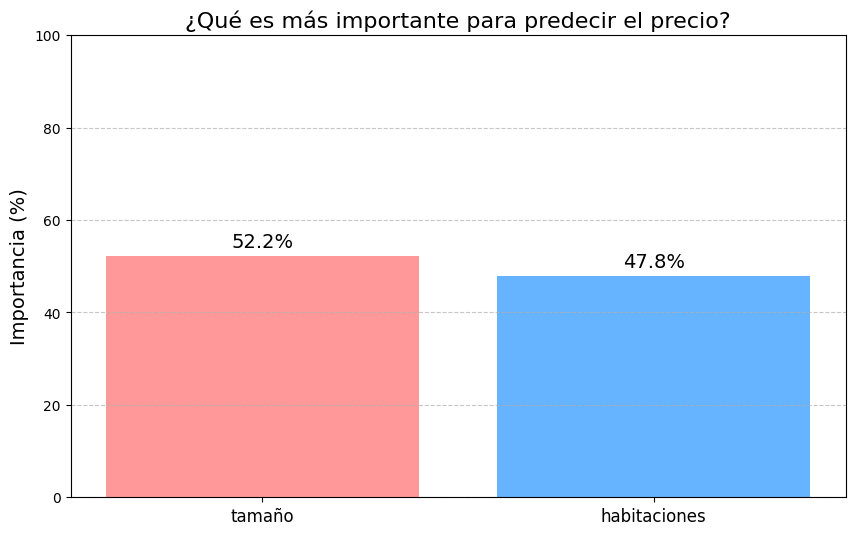

c:\Users\admin\Desktop\pildora\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


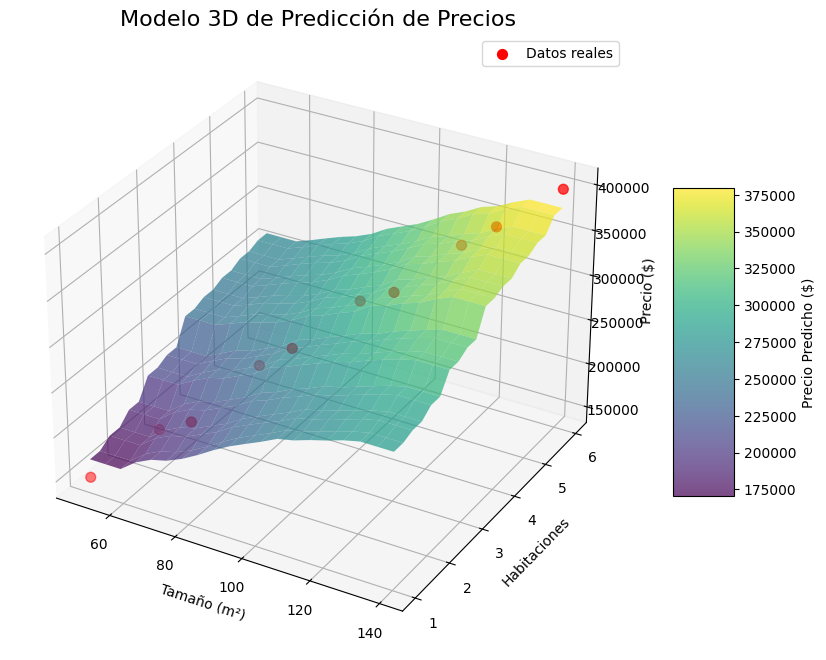

In [17]:
## 7. 🎤 Presentando la Solución
from sklearn.metrics import mean_squared_error
#Ahora vamos a mostrar lo que aprendió nuestro modelo.


# Obtenemos la importancia de cada característica
feature_importances = search.best_estimator_["random_forest"].feature_importances_
features_df = pd.DataFrame({
    "Característica": ["tamaño", "habitaciones"],
    "Importancia (%)": feature_importances * 100
}).sort_values("Importancia (%)", ascending=False)

print("🏆 ¿Qué características son más importantes para predecir el precio?")
print(features_df)

# Visualizamos la importancia de las características
plt.figure(figsize=(10, 6))
plt.bar(features_df["Característica"], features_df["Importancia (%)"], color=['#ff9999', '#66b3ff'])
plt.title("¿Qué es más importante para predecir el precio?", fontsize=16)
plt.ylabel("Importancia (%)", fontsize=14)
plt.xticks(fontsize=12)
plt.ylim(0, 100)

# Añadimos etiquetas con los porcentajes
for i, v in enumerate(features_df["Importancia (%)"]):
    plt.text(i, v + 2, f"{v:.1f}%", ha='center', fontsize=14)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig("importancia_caracteristicas.png")
plt.show()

# Creamos un gráfico 3D para visualizar el modelo
from mpl_toolkits.mplot3d import Axes3D

# Creamos una malla de puntos para visualizar
tamaño_range = np.linspace(min(df["tamaño"]), max(df["tamaño"]), 20)
habitaciones_range = np.linspace(min(df["habitaciones"]), max(df["habitaciones"]), 20)
tamaño_grid, habitaciones_grid = np.meshgrid(tamaño_range, habitaciones_range)

# Aplanamos la malla para hacer predicciones
puntos = np.c_[tamaño_grid.ravel(), habitaciones_grid.ravel()]
predicciones = search.best_estimator_.predict(puntos)

# Reformamos las predicciones para la malla
z = predicciones.reshape(habitaciones_grid.shape)

# Creamos el gráfico 3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Superficie de predicción
surf = ax.plot_surface(tamaño_grid, habitaciones_grid, z, cmap='viridis', alpha=0.7)

# Puntos de datos reales
ax.scatter(df["tamaño"], df["habitaciones"], df["precio"], c='red', s=50, label='Datos reales')

ax.set_xlabel('Tamaño (m²)')
ax.set_ylabel('Habitaciones')
ax.set_zlabel('Precio ($)')
ax.set_title('Modelo 3D de Predicción de Precios', fontsize=16)
fig.colorbar(surf, shrink=0.5, aspect=5, label='Precio Predicho ($)')

plt.legend()
plt.savefig("modelo_3d.png")
plt.show()


# **Explicación para niños:**
# ¡Es hora de presentar lo que descubrimos!
# 1. El gráfico de barras muestra qué es más importante para adivinar el precio: ¿el tamaño o el número de habitaciones?
# 2. El gráfico 3D es como una "montaña mágica" donde cada punto es una casa. La altura de la montaña muestra el precio. Podemos ver cómo el precio sube cuando aumentan el tamaño y las habitaciones.

# Es como un mapa del tesoro que nos muestra dónde están los precios altos y bajos.



💾 Modelo guardado como 'mi_adivinador_de_precios.pkl'

🔮 Probando nuestro modelo con casas nuevas:
Nuevas casas para predecir:
   tamaño  habitaciones
0      75             2
1     120             4
2      95             3

✨ Resultados de las predicciones:
   Tamaño (m²)  Habitaciones  Precio Predicho ($)
0           75             2            205794.39
1          120             4            329813.08
2           95             3            266542.06


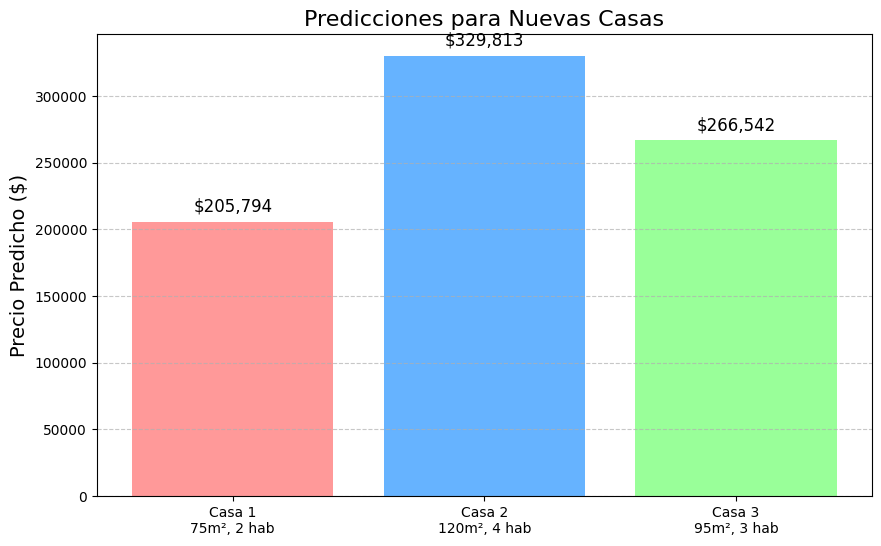


🎉 ¡Proyecto completo! Ahora tenemos un adivinador de precios de casas


In [18]:
## 8. 🚀 Lanzando y Monitoreando el Sistema
from sklearn.metrics import mean_squared_error

#Finalmente, guardamos nuestro modelo para usarlo en el futuro.


# Guardamos nuestro modelo en un archivo
modelo_filename = "mi_adivinador_de_precios.pkl"
joblib.dump(search.best_estimator_, modelo_filename)
print(f"💾 Modelo guardado como '{modelo_filename}'")

# Ejemplo de cómo usar el modelo en el futuro
print("\n🔮 Probando nuestro modelo con casas nuevas:")

# Creamos algunas casas de ejemplo
casas_nuevas = pd.DataFrame({
    "tamaño": [75, 120, 95],
    "habitaciones": [2, 4, 3]
})

print("Nuevas casas para predecir:")
print(casas_nuevas)

# Cargamos el modelo guardado
modelo_cargado = joblib.load(modelo_filename)

# Hacemos predicciones
predicciones = modelo_cargado.predict(casas_nuevas)

# Mostramos los resultados
resultados = pd.DataFrame({
    "Tamaño (m²)": casas_nuevas["tamaño"],
    "Habitaciones": casas_nuevas["habitaciones"],
    "Precio Predicho ($)": predicciones.round(2)
})

print("\n✨ Resultados de las predicciones:")
print(resultados)

# Visualizamos las predicciones nuevas
plt.figure(figsize=(10, 6))
bars = plt.bar(range(len(predicciones)), predicciones, color=['#ff9999', '#66b3ff', '#99ff99'])
plt.xticks(range(len(predicciones)), [
    f"Casa 1\n{casas_nuevas['tamaño'][0]}m², {casas_nuevas['habitaciones'][0]} hab",
    f"Casa 2\n{casas_nuevas['tamaño'][1]}m², {casas_nuevas['habitaciones'][1]} hab",
    f"Casa 3\n{casas_nuevas['tamaño'][2]}m², {casas_nuevas['habitaciones'][2]} hab"
])
plt.ylabel("Precio Predicho ($)", fontsize=14)
plt.title("Predicciones para Nuevas Casas", fontsize=16)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Añadimos etiquetas con los precios
for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 5000,
            f"${predicciones[i]:,.0f}",
            ha='center', va='bottom', fontsize=12)

plt.savefig("predicciones_nuevas.png")
plt.show()

print("\n🎉 ¡Proyecto completo! Ahora tenemos un adivinador de precios de casas")




# ¿Y COMO LO USO, COMO DEBERIA USARLO? 

GitHub Copilot: ¡Felicidades por completar tu proyecto! Ahora que tienes un modelo entrenado y guardado como mi_adivinador_de_precios.pkl, puedes usarlo para predecir precios de casas nuevas. Aquí te explico cómo usarlo paso a paso:

---

### **Cómo usar el modelo guardado**
1. **Carga el modelo guardado**:
   - Usa la biblioteca `joblib` para cargar el archivo mi_adivinador_de_precios.pkl.

2. **Prepara los datos de entrada**:
   - Crea un `DataFrame` con las características de las casas nuevas (por ejemplo, tamaño y número de habitaciones).

3. **Haz predicciones**:
   - Usa el modelo cargado para predecir los precios de las casas nuevas.

4. **Muestra los resultados**:
   - Presenta los resultados en un formato claro, como un `DataFrame` o un gráfico.

---

### **Ejemplo de código para usar el modelo**
```python
import pandas as pd
import joblib

# Cargar el modelo guardado
modelo_filename = "mi_adivinador_de_precios.pkl"
modelo_cargado = joblib.load(modelo_filename)

# Crear datos de ejemplo para nuevas casas
casas_nuevas = pd.DataFrame({
    "tamaño": [75, 120, 95],  # Tamaño en m²
    "habitaciones": [2, 4, 3]  # Número de habitaciones
})

# Hacer predicciones
predicciones = modelo_cargado.predict(casas_nuevas)

# Mostrar los resultados
resultados = pd.DataFrame({
    "Tamaño (m²)": casas_nuevas["tamaño"],
    "Habitaciones": casas_nuevas["habitaciones"],
    "Precio Predicho ($)": predicciones.round(2)
})

print("\n✨ Resultados de las predicciones:")
print(resultados)
```

---

### **Cómo interpretar los resultados**
- El código anterior mostrará un `DataFrame` con las características de las casas nuevas (tamaño y habitaciones) y el precio predicho por el modelo.
- Puedes usar este modelo para predecir precios de cualquier casa, siempre que proporciones las características necesarias.

---

### **Visualización opcional**
Si quieres visualizar las predicciones, puedes usar un gráfico de barras:
```python
import matplotlib.pyplot as plt

# Visualizar las predicciones
plt.figure(figsize=(10, 6))
bars = plt.bar(range(len(predicciones)), predicciones, color=['#ff9999', '#66b3ff', '#99ff99'])
plt.xticks(range(len(predicciones)), [
    f"Casa 1\n{casas_nuevas['tamaño'][0]}m², {casas_nuevas['habitaciones'][0]} hab",
    f"Casa 2\n{casas_nuevas['tamaño'][1]}m², {casas_nuevas['habitaciones'][1]} hab",
    f"Casa 3\n{casas_nuevas['tamaño'][2]}m², {casas_nuevas['habitaciones'][2]} hab"
])
plt.ylabel("Precio Predicho ($)", fontsize=14)
plt.title("Predicciones para Nuevas Casas", fontsize=16)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Añadir etiquetas con los precios
for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 5000,
             f"${predicciones[i]:,.0f}",
             ha='center', va='bottom', fontsize=12)

plt.show()
```

---

### **Próximos pasos**
- **Integración**: Puedes integrar este modelo en una aplicación web o API para que otros usuarios puedan usarlo.
- **Optimización**: Si necesitas mejorar la precisión, puedes ajustar más parámetros o probar otros algoritmos.

¡Avísame si necesitas ayuda con algo más! 😊


✨ Resultados de las predicciones:
   Tamaño (m²)  Habitaciones  Precio Predicho ($)
0           75             2            205794.39
1          120             4            329813.08
2           95             3            266542.06
3         2000             9            379626.17
4         1000             7            379626.17


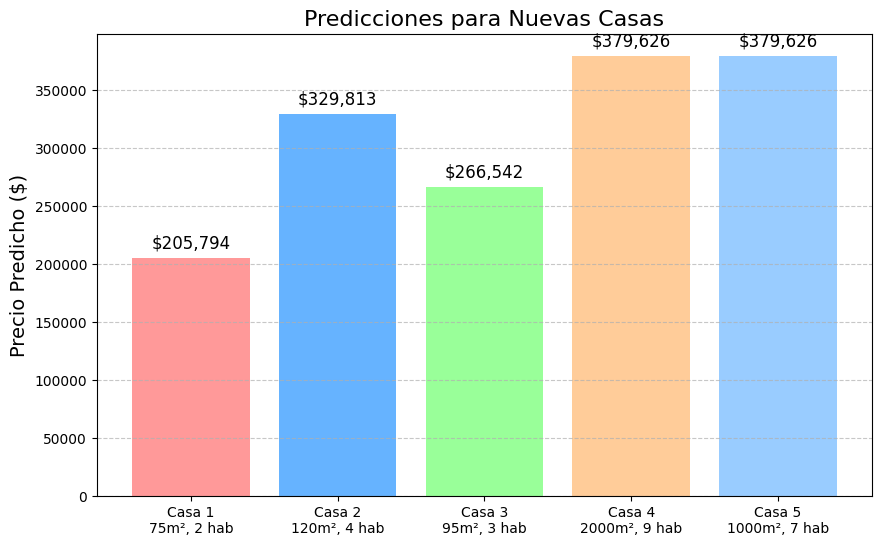

In [1]:
# Cómo usar el modelo guardado
# 1. Carga el modelo guardado:
# - Usa la biblioteca `joblib` para cargar el archivo mi_adivinador_de_precios.pkl.

# 2. Prepara los datos de entrada:
# - Crea un `DataFrame` con las características de las casas nuevas (por ejemplo, tamaño y número de habitaciones).

# 3. Haz predicciones:
# - Usa el modelo cargado para predecir los precios de las casas nuevas.

# 4. Muestra los resultados:
# - Presenta los resultados en un formato claro, como un `DataFrame` o un gráfico.



#Ejemplo de código para usar el modelo

import pandas as pd
import joblib
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Cargar el modelo guardado
modelo_filename = "mi_adivinador_de_precios.pkl"
modelo_cargado = joblib.load(modelo_filename)

# Crear datos de ejemplo para nuevas casas
casas_nuevas = pd.DataFrame({
    "tamaño": [75, 120, 95, 2000, 1000],  # Tamaño en m²
    "habitaciones": [2, 4, 3, 9, 7]  # Número de habitaciones
})

# Hacer predicciones
predicciones = modelo_cargado.predict(casas_nuevas)

# Mostrar los resultados
resultados = pd.DataFrame({
    "Tamaño (m²)": casas_nuevas["tamaño"],
    "Habitaciones": casas_nuevas["habitaciones"],
    "Precio Predicho ($)": predicciones.round(2)
})

print("\n✨ Resultados de las predicciones:")
print(resultados)


# Visualizar las predicciones
plt.figure(figsize=(10, 6))

# Crear las barras del gráfico
bars = plt.bar(range(len(predicciones)), predicciones, color=['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#99ccff'])

# Generar etiquetas dinámicamente para todas las casas
etiquetas = [
    f"Casa {i+1}\n{casas_nuevas['tamaño'][i]}m², {casas_nuevas['habitaciones'][i]} hab"
    for i in range(len(casas_nuevas))
]

# Ajustar las etiquetas en el gráfico
plt.xticks(range(len(predicciones)), etiquetas)

# Configurar el resto del gráfico
plt.ylabel("Precio Predicho ($)", fontsize=14)
plt.title("Predicciones para Nuevas Casas", fontsize=16)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Añadir etiquetas con los precios encima de las barras
for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 5000,
             f"${predicciones[i]:,.0f}",
             ha='center', va='bottom', fontsize=12)

# Mostrar el gráfico
plt.show()


# CASA 4 Y CASA 5 NO SON REPRESENTATIVAS PARA MI


El problema con las predicciones probablemente se debe a que el modelo no está capturando correctamente la relación entre el tamaño de la casa y su precio. Esto puede deberse a varias razones:

---

### **Posibles causas del problema:**
1. **Datos insuficientes o no representativos**:
   - Si los datos de entrenamiento no incluyen casas con tamaños similares a 1000 m² o 2000 m², el modelo no puede generalizar correctamente para estos valores.

2. **Modelo subentrenado**:
   - El modelo puede no estar suficientemente entrenado o ajustado para capturar relaciones complejas entre las características (tamaño y habitaciones) y el precio.

3. **Parámetros del modelo**:
   - Los parámetros del modelo (como `max_depth`, `n_estimators`, etc.) pueden estar limitando su capacidad para aprender patrones más complejos.

4. **Escalado de datos**:
   - Si los datos no están correctamente escalados, el modelo puede no interpretar correctamente la magnitud de los valores grandes como 1000 m² o 2000 m².

---

### **Soluciones sugeridas:**
1. **Revisar los datos de entrenamiento**:
   - Asegúrate de que los datos de entrenamiento incluyan casas con tamaños grandes (similares a 1000 m² o 2000 m²). Si no es así, considera agregar datos adicionales.

2. **Ajustar el modelo**:
   - Incrementa la profundidad máxima (`max_depth`) o el número de estimadores (`n_estimators`) del modelo `RandomForestRegressor` para permitirle aprender patrones más complejos.

3. **Revisar el escalado de datos**:
   - Verifica que el escalado de las características (tamaño y habitaciones) sea consistente y no esté afectando la interpretación de los valores grandes.

4. **Visualizar la relación entre tamaño y precio**:
   - Crea un gráfico para visualizar cómo el modelo predice los precios en función del tamaño y las habitaciones. Esto puede ayudarte a identificar si el modelo está subestimando los precios para tamaños grandes.

---

### **Próximos pasos:**
1. **Reentrenar el modelo con ajustes**:
   - Incrementa los parámetros del modelo y reentrena:
     ```python
     random_forest = RandomForestRegressor(n_estimators=200, max_depth=30, random_state=42)
     ```

2. **Evaluar el modelo con datos adicionales**:
   - Si es posible, agrega más datos representativos al conjunto de entrenamiento.

3. **Diagnosticar el problema con gráficos**:
   - Visualiza las predicciones del modelo para diferentes tamaños de casas para identificar patrones incorrectos.

¿Quieres que implemente alguno de estos ajustes directamente en tu código? 😊

# MODIFICACIONES QUE HICE DEL CODIGO CON EL GRAFICO:

Aquí tienes el código completo modificado para que sea dinámico y funcione correctamente con cualquier número de casas en `casas_nuevas`:

```python
# Visualizar las predicciones
plt.figure(figsize=(10, 6))

# Crear las barras del gráfico
bars = plt.bar(range(len(predicciones)), predicciones, color=['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#99ccff'])

# Generar etiquetas dinámicamente para todas las casas
etiquetas = [
    f"Casa {i+1}\n{casas_nuevas['tamaño'][i]}m², {casas_nuevas['habitaciones'][i]} hab"
    for i in range(len(casas_nuevas))
]

# Ajustar las etiquetas en el gráfico
plt.xticks(range(len(predicciones)), etiquetas)

# Configurar el resto del gráfico
plt.ylabel("Precio Predicho ($)", fontsize=14)
plt.title("Predicciones para Nuevas Casas", fontsize=16)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Añadir etiquetas con los precios encima de las barras
for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 5000,
             f"${predicciones[i]:,.0f}",
             ha='center', va='bottom', fontsize=12)

# Mostrar el gráfico
plt.show()
```

### **Cambios realizados:**
1. **Etiquetas dinámicas**:
   - Se utiliza un bucle `for` para generar etiquetas dinámicamente basadas en el número de casas en `casas_nuevas`.
   - Esto asegura que el código funcione sin importar cuántas casas haya.

2. **Colores adicionales**:
   - Se agregaron más colores en la lista `color` para manejar más barras si hay más casas.

3. **Flexibilidad**:
   - El código ahora es robusto y no depende de un número fijo de casas.

### **Cómo funciona ahora:**
- Si `casas_nuevas` tiene 3 casas, generará 3 barras y 3 etiquetas.
- Si `casas_nuevas` tiene 5 casas, generará 5 barras y 5 etiquetas.
- El gráfico se ajustará automáticamente al número de casas en `casas_nuevas`.

¡Este código debería funcionar perfectamente para cualquier número de casas! 😊

La diferencia principal entre el código original y la nueva modificación radica en **cómo se generan las etiquetas para el eje X del gráfico de barras (`plt.xticks`)**. Aquí te explico las diferencias clave:

---

### **Código original**
```python
plt.xticks(range(len(predicciones)), [
    f"Casa 1\n{casas_nuevas['tamaño'][0]}m², {casas_nuevas['habitaciones'][0]} hab",
    f"Casa 2\n{casas_nuevas['tamaño'][1]}m², {casas_nuevas['habitaciones'][1]} hab",
    f"Casa 3\n{casas_nuevas['tamaño'][2]}m², {casas_nuevas['habitaciones'][2]} hab"
])
```

#### **Características del código original:**
1. **Etiquetas fijas**:
   - Las etiquetas para el eje X están definidas manualmente para 3 casas específicas.
   - Esto funciona solo si `casas_nuevas` tiene exactamente 3 casas.

2. **Problema**:
   - Si `casas_nuevas` tiene más o menos de 3 casas, el número de etiquetas no coincidirá con el número de barras en el gráfico, lo que genera un error (`ValueError`).

---

### **Nueva modificación**
```python
plt.xticks(range(len(predicciones)), [
    f"Casa {i+1}\n{casas_nuevas['tamaño'][i]}m², {casas_nuevas['habitaciones'][i]} hab"
    for i in range(len(casas_nuevas))
])
```

#### **Características de la nueva modificación:**
1. **Etiquetas dinámicas**:
   - Las etiquetas se generan automáticamente para todas las casas en `casas_nuevas` utilizando un bucle `for`.
   - El número de etiquetas siempre coincidirá con el número de casas en `casas_nuevas`.

2. **Ventaja**:
   - Este enfoque es flexible y no depende de un número fijo de casas.
   - Si agregas o eliminas casas en `casas_nuevas`, el gráfico se ajustará automáticamente.

---

### **Comparación directa**
| **Aspecto**               | **Código original**                                                                 | **Nueva modificación**                                                                 |
|----------------------------|-------------------------------------------------------------------------------------|---------------------------------------------------------------------------------------|
| **Generación de etiquetas** | Manual, para 3 casas específicas.                                                   | Automática, basada en el número de casas en `casas_nuevas`.                           |
| **Flexibilidad**           | No funciona si `casas_nuevas` tiene más o menos de 3 casas.                         | Funciona para cualquier número de casas en `casas_nuevas`.                            |
| **Errores potenciales**    | Genera un `ValueError` si el número de etiquetas no coincide con el número de barras.| No genera errores porque las etiquetas se ajustan dinámicamente.                     |

---

### **Conclusión**
La nueva modificación es más robusta y flexible porque genera dinámicamente las etiquetas para el gráfico. Esto asegura que el código funcione correctamente sin importar cuántas casas haya en `casas_nuevas`. Si planeas trabajar con datos que pueden cambiar en tamaño, la nueva modificación es la mejor opción.